<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/TX_featureRanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:
Using Random Forest to estimate the gini index and feature importance for all features from NY dataset

Using Scikit-learn to compute PCA

## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [3]:
NY_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/TX_labeledData_Sep16.csv',low_memory=False)
print(NY_labeled_data.shape)

(73558, 19)


In [4]:
NY_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
dtype: object

## Preprocessing data 

* drop na
* convert categorical code

In [5]:
NY_labeled_data['label_code'] = NY_labeled_data['label'].astype('category').cat.codes

NY_labeled_data.head(2)

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code
0,2020-03-01,48001,Anderson County,16.0,15.0,0.0,0.0,3.0,0.0,27.49,8.910,79,54.333710,0,0.0,0,0.0,LessSpread,flat_growth,0
1,2020-03-01,48215,Hidalgo County,20.0,7.0,14.0,12.0,0.0,-3.0,-2.07,6.021,81,553.010115,0,0.0,0,0.0,LessSpread,flat_growth,0


In [6]:
NY_labeled_data = NY_labeled_data.dropna()

In [7]:
NY_labeled_data[pd.isna(NY_labeled_data['label'])]

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code


In [8]:
NY_labeled_data['label_code'].unique()

array([0, 1, 2], dtype=int8)

In [9]:
NY_labeled_data['growth_code'] = NY_labeled_data['growth_label'].astype('category').cat.codes
NY_labeled_data.head()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-03-01,48001,Anderson County,16.0,15.0,0.0,0.0,3.0,0.0,27.49,8.910,79,54.333710,0,0.0,0,0.0,LessSpread,flat_growth,0,2
1,2020-03-01,48215,Hidalgo County,20.0,7.0,14.0,12.0,0.0,-3.0,-2.07,6.021,81,553.010115,0,0.0,0,0.0,LessSpread,flat_growth,0,2
2,2020-03-01,48373,Polk County,25.0,19.0,0.0,0.0,3.0,0.0,23.02,10.595,84,48.579591,0,0.0,0,0.0,LessSpread,flat_growth,0,2
3,2020-03-01,48217,Hill County,22.0,11.0,0.0,13.0,3.0,0.0,72.23,14.110,62,38.221430,0,0.0,0,0.0,LessSpread,flat_growth,0,2
4,2020-03-01,48219,Hockley County,15.0,14.0,0.0,0.0,3.0,0.0,-33.99,3.309,45,25.342639,0,0.0,0,0.0,LessSpread,flat_growth,0,2


In [10]:
NY_labeled_data['growth_code'].unique()

array([2, 4, 0, 3, 1], dtype=int8)

In [11]:
NY_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
label_code                  int8
growth_code                 int8
dtype: object

In [12]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['label_code']

X = NY_labeled_data[feature_labels]
y = NY_labeled_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [13]:
len(feature_labels)

11

# PCA Computation

In [14]:
print(len(feature_labels))

11


In [15]:
# split into training and testing datasets


X = NY_labeled_data[feature_labels].values
y = NY_labeled_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train)
print(y_train)

[[  0.           0.           0.         ...  34.          48.95419929
    0.        ]
 [  0.           0.           0.         ...  49.           8.30974207
    0.        ]
 [-12.          15.          -2.         ...  74.          67.16435625
    0.        ]
 ...
 [  0.           0.           0.         ...  49.          31.7680183
    1.        ]
 [ 10.          16.           0.         ...  68.          20.78353322
    0.        ]
 [  3.           0.           0.         ...  77.          71.62363839
    1.        ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [16]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
principalDf

,principal component 1,principal component 2
0,-103.302699,11.230071
1,395.438264,5.909955
2,-109.167419,13.387976
3,-120.051308,29.424469
4,-130.976923,-54.768824
...,...,...
73491,852.770435,-2.607198
73492,-144.835197,-3.006327
73493,-140.063762,27.162659
73494,40.351784,-4.567918


In [19]:
finalDf = pd.concat([principalDf, NY_labeled_data[target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,label_code
0,-103.302699,11.230071,0.0
1,395.438264,5.909955,0.0
2,-109.167419,13.387976,0.0
3,-120.051308,29.424469,0.0
4,-130.976923,-54.768824,0.0
...,...,...,...
73553,NaN,NaN,0.0
73554,NaN,NaN,0.0
73555,NaN,NaN,0.0
73556,NaN,NaN,0.0


0
1
2


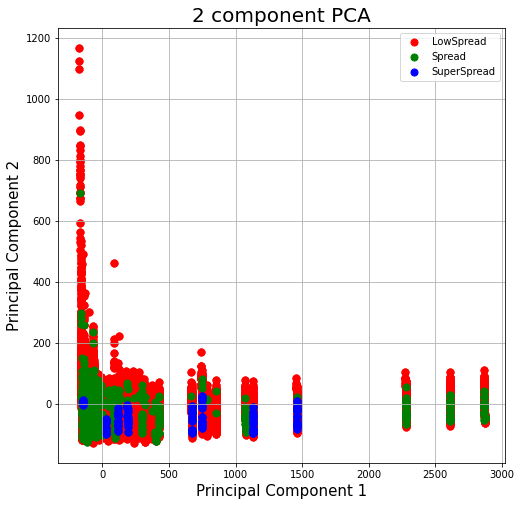

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['label_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [22]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[3.27164006 1.45788484 1.19498189 1.12141648 0.30827446 0.38017774
 0.4740978  0.53332643 0.80357513 0.77493946 0.67989954] -> eigenvalues
[29.74160424 13.25324094 10.86326054 10.19449709  2.80244063  3.4560941
  4.30989619  4.84832781  7.30508649  7.04476722  6.18078476]  -> percent of variability explained


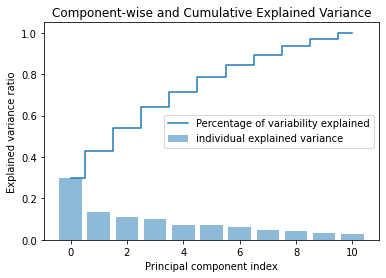

In [23]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,11), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[-0.45067746 -0.07788046]
 [-0.35359914 -0.09292802]
 [-0.13667382 -0.42289039]
 [-0.36772902  0.00413043]
 [-0.3583666   0.31425132]
 [ 0.38030955 -0.34568785]
 [-0.30538418 -0.45608443]
 [-0.13070703  0.01155317]
 [-0.23695763 -0.2059869 ]
 [ 0.27150318 -0.36063748]
 [-0.06844281 -0.45558228]]


In [25]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[-1.37118602  0.80526331]
 [-0.24229243  0.92706253]
 [ 0.22157952 -0.25122093]
 ...
 [-0.96138681  0.02573338]
 [-1.9959284   1.11419759]
 [-0.31739056 -1.21762954]]


In [26]:
np.unique(y_train)
X_train_pca

array([[-1.37118602,  0.80526331],
       [-0.24229243,  0.92706253],
       [ 0.22157952, -0.25122093],
       ...,
       [-0.96138681,  0.02573338],
       [-1.9959284 ,  1.11419759],
       [-0.31739056, -1.21762954]])

In [27]:
NY_labeled_data.dtypes

Date                      object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
label                     object
growth_label              object
label_code                  int8
growth_code                 int8
dtype: object

In [28]:
NY_labeled_data['County Name'].unique()

array(['Anderson County', 'Hidalgo County', 'Polk County', 'Hill County',
       'Hockley County', 'Pecos County', 'Hood County', 'Parmer County',
       'Hopkins County', 'Houston County', 'Parker County',
       'Howard County', 'Hunt County', 'Panola County',
       'Hutchinson County', 'Palo Pinto County', 'Jack County',
       'Jackson County', 'Orange County', 'Jasper County',
       'Potter County', 'Henderson County', 'Hays County', 'Rains County',
       'Runnels County', 'Gonzales County', 'Rockwall County',
       'Gray County', 'Grayson County', 'Robertson County',
       'Gregg County', 'Grimes County', 'Refugio County',
       'Ochiltree County', 'Guadalupe County', 'Hale County',
       'Hamilton County', 'Red River County', 'Hardeman County',
       'Hardin County', 'Zapata County', 'Harris County',
       'Randall County', 'Harrison County', 'Reeves County',
       'Jefferson County', 'Jim Hogg County', 'Jim Wells County',
       'Winkler County', 'Liberty County', 'Li

# Selecting three counties in Ny
* Austin County
* Dallas County
* Houston County

### Filtered data for county

In [29]:
Nassau_county_data = NY_labeled_data[NY_labeled_data['County Name'] == 'Austin County']
Westchester_county_data = NY_labeled_data[NY_labeled_data['County Name'] == 'Dallas County']
Suffolk_county_data = NY_labeled_data[NY_labeled_data['County Name'] == 'Houston County']

print(' Austin county data ',Nassau_county_data.shape)
print(' Dallas county data ',Westchester_county_data.shape)
print(' Houston county data ',Suffolk_county_data.shape)

 Austin county data  (378, 21)
 Dallas county data  (378, 21)
 Houston county data  (378, 21)


# Note about growth label

growth_code| label
----|----
 0 | drastic decrement
 1 | drastic growth
 2 | flat
 3 | mild decrement
 4 | mild increment





# Austin county


In [30]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['label_code']

print(Nassau_county_data['growth_code'].unique())

Nassau_county_data_growth1 = Nassau_county_data[Nassau_county_data['growth_code'] == 1]
Nassau_county_data_growth2 = Nassau_county_data[Nassau_county_data['growth_code'] == 2]
Nassau_county_data_growth3 = Nassau_county_data[Nassau_county_data['growth_code'] == 3]
Nassau_county_data_growth4 = Nassau_county_data[Nassau_county_data['growth_code'] == 4]

print(Nassau_county_data_growth1.shape)
print(Nassau_county_data_growth2.shape)
print(Nassau_county_data_growth3.shape)

print(Nassau_county_data_growth4.shape)


[2 4 3]
(0, 21)
(56, 21)
(140, 21)
(182, 21)


In [31]:
Nassau_county_data.head()

,Date,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
121,2020-03-01,48015,Austin County,15.0,10.0,0.0,0.0,4.0,0.0,45.92,14.176,60,46.452491,0,0.0,0,0.0,LessSpread,flat_growth,0,2
192,2020-03-01,48015,Austin County,15.0,10.0,0.0,0.0,4.0,0.0,45.92,14.176,60,46.452491,0,0.0,0,0.0,LessSpread,flat_growth,0,2
632,2020-03-02,48015,Austin County,11.0,-2.0,0.0,0.0,6.0,-2.0,11.06,23.325,100,46.452491,0,0.0,0,0.0,LessSpread,flat_growth,0,2
684,2020-03-02,48015,Austin County,11.0,-2.0,0.0,0.0,6.0,-2.0,11.06,23.325,100,46.452491,0,0.0,0,0.0,LessSpread,flat_growth,0,2
928,2020-03-03,48015,Austin County,10.0,2.0,0.0,0.0,6.0,-2.0,11.56,19.812,84,46.452491,0,0.0,0,0.0,LessSpread,flat_growth,0,2


NY city data doesn't have any drastic decrement data. Let's verify the metrics for available growth labels - drastic growth, flat, mild decrement, mild increment

In [32]:
# print("** Printing Austin county data for drastic growth ** ")

# X = Nassau_county_data_growth1[feature_labels]
# y = Nassau_county_data_growth1[target_column]
# print(X.shape)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# # Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,min_samples_leaf=5)

# # Train the classifier
# clf.fit(X_train, y_train)

# # Print the name and gini importance of each feature
# for feature in zip(feature_labels, clf.feature_importances_):
#     print(feature)



# #  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

# clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# # Train the classifier
# clf.fit(X_train, y_train)

# # Print the name and gini importance of each feature
# for feature in zip(feature_labels, clf.feature_importances_):
#     print(feature)


In [33]:
print("** Printing Austin county data for flat growth ** ")

X = Nassau_county_data_growth2[feature_labels]
y = Nassau_county_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Austin county data for flat growth ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [34]:
print("** Printing Nassau county data for mild decrement ** ")

X = Nassau_county_data_growth3[feature_labels]
y = Nassau_county_data_growth3[target_column]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Nassau county data for mild decrement ** 
(140, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [35]:

print("** Printing Austin county data for mild increment ** ")

X = Nassau_county_data_growth4[feature_labels]
y = Nassau_county_data_growth4[target_column]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Austin county data for mild increment ** 
(182, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


## Correlation map

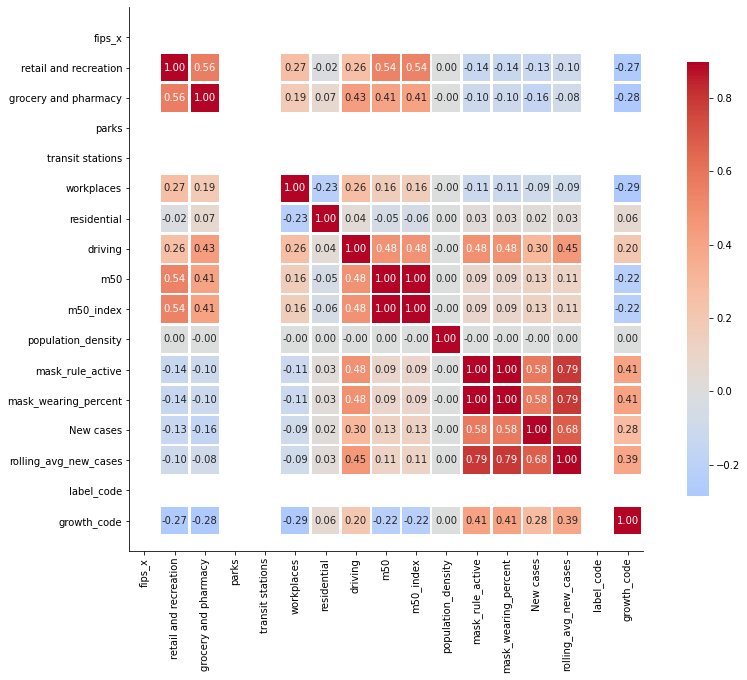

In [36]:


# Correlation

corr = Nassau_county_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

# Dallas county 

In [37]:
print(Westchester_county_data['growth_code'].unique())

Westchester_county_data_growth2 = Westchester_county_data[Westchester_county_data['growth_code'] == 2]
Westchester_county_data_growth3 = Westchester_county_data[Westchester_county_data['growth_code'] == 3]
Westchester_county_data_growth4 = Westchester_county_data[Westchester_county_data['growth_code'] == 4]

print(Westchester_county_data_growth2.shape)

print(Westchester_county_data_growth3.shape)

print(Westchester_county_data_growth4.shape)



[2 1 4 3]
(28, 21)
(182, 21)
(140, 21)


In [38]:

print("** Printing Dallas county data for mild increment ** ")

X = Westchester_county_data_growth2[feature_labels]
y = Westchester_county_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Dallas county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [39]:

print("** Printing Dallas county data for mild increment ** ")

X = Westchester_county_data_growth3[feature_labels]
y = Westchester_county_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Dallas county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [40]:

print("** Printing Dallas county data for mild increment ** ")

X = Westchester_county_data_growth4[feature_labels]
y = Westchester_county_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Dallas county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


# Suffolk county

In [41]:
print(Suffolk_county_data['growth_code'].unique())

Suffolk_county_data_growth1 = Suffolk_county_data[Suffolk_county_data['growth_code'] == 1]
print(Suffolk_county_data_growth1.shape)
Suffolk_county_data_growth2 = Suffolk_county_data[Suffolk_county_data['growth_code'] == 2]
print(Suffolk_county_data_growth2.shape)

Suffolk_county_data_growth3 = Suffolk_county_data[Suffolk_county_data['growth_code'] == 3]
print(Suffolk_county_data_growth3.shape)

Suffolk_county_data_growth4 = Suffolk_county_data[Suffolk_county_data['growth_code'] == 4]
print(Suffolk_county_data_growth4.shape)


[2 3 4]
(0, 21)
(56, 21)
(126, 21)
(196, 21)


In [43]:

# print("** Printing Houston county data for mild increment ** ")

# X = Suffolk_county_data_growth1[feature_labels]
# y = Suffolk_county_data_growth1[target_column]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# # Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# # Train the classifier
# clf.fit(X_train, y_train)

# # Print the name and gini importance of each feature
# for feature in zip(feature_labels, clf.feature_importances_):
#     print(feature)



# #  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

# clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# # Train the classifier
# clf.fit(X_train, y_train)

# # Print the name and gini importance of each feature
# for feature in zip(feature_labels, clf.feature_importances_):
#     print(feature)


In [44]:

print("** Printing Houston county data for mild increment ** ")

X = Suffolk_county_data_growth2[feature_labels]
y = Suffolk_county_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Houston county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [45]:

print("** Printing Houston county data for mild increment ** ")

X = Suffolk_county_data_growth3[feature_labels]
y = Suffolk_county_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Houston county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


In [46]:

print("** Printing Houston county data for mild increment ** ")

X = Suffolk_county_data_growth4[feature_labels]
y = Suffolk_county_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


** Printing Houston county data for mild increment ** 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


# Growth label-wise feature selection

In [47]:
NY_labeled_data_growth1 = NY_labeled_data[NY_labeled_data['growth_code'] == 0]
NY_labeled_data_growth2 = NY_labeled_data[NY_labeled_data['growth_code'] == 1]
NY_labeled_data_growth3 = NY_labeled_data[NY_labeled_data['growth_code'] == 2]
NY_labeled_data_growth4 = NY_labeled_data[NY_labeled_data['growth_code'] == 3]
NY_labeled_data_growth5 = NY_labeled_data[NY_labeled_data['growth_code'] == 4]

print(NY_labeled_data_growth1.shape)
print(NY_labeled_data_growth2.shape)
print(NY_labeled_data_growth3.shape)
print(NY_labeled_data_growth4.shape)
print(NY_labeled_data_growth5.shape)

(440, 21)
(508, 21)
(11762, 21)
(29592, 21)
(31194, 21)


### Growth label : 0 -> drastic decrement

In [48]:

print("** Printing NY all county data for mild increment ** ")
print(NY_labeled_data_growth1.shape)
X = NY_labeled_data_growth1[feature_labels]
y = NY_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for mild increment ** 
(440, 21)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[False False False False False False False False  True  True  True]
retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1
[9 8 7 6 5 4 3 2 1 1 1]
3


3

### Growth label : 1 -> drastic growth

In [49]:

print("** Printing NY all county data for drastic growth ** ")
print(NY_labeled_data_growth2.shape)
X = NY_labeled_data_growth2[feature_labels]
y = NY_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
print("Printing feature ranking ")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for drastic growth ** 
(508, 21)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.03201509852254878)
('grocery and pharmacy', 0.031196902821800068)
('parks', 0.05854734787289687)
('transit stations', 0.059933047678870456)
('workplaces', 0.02585620679110204)
('residential', 0.09202719715898297)
('driving', 0.04415086486784042)
('m50', 0.0857467326079169)
('m50_index', 0.05139069715353563)
('population_density', 0.5117321767137887)
('mask_rule_active', 0.007403727810717232)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.030228852845104362)
('grocery and pharmacy', 0.029159119632127684)
('parks', 0.05015605418676741)
('transit stations', 0.05728052119138343)
('workplaces', 0.02498667270365061)
('residential', 0.07926126076304259)
('driving', 0.052643744479404085)
('m50', 0.09488775658366794)
('m50_index', 0.058202842264439794)
('population_density', 0.5154974542788474)
('mask_rule_active', 0.007695721071564659)
[0.04542374 0.04240061 0.07530003 0.05756425 0.04026374 0.13438507
 0.05899232 0.08859217 0.06639257 0.3746162  0.0160693 ]
[False False False False False  True False False  True  True False]
Printing feature ranking 
retail and recreation 6
grocery and pharmacy 7
parks 3
transit stations 4
workplaces 8
residential 1
driving 5
m50 2
m50_index 1
population_density 1
mask_rule_active 9
[6 7 3 4 8 1 5 2 1 1 9]
3


3

### Growth label : 2 -> Flat

In [50]:

print("** Printing NY all county data for flat ** ")

X = NY_labeled_data_growth3[feature_labels]
y = NY_labeled_data_growth3[target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for flat ** 
(11762, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[False False False False False False False False  True  True  True]
retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1
[9 8 7 6 5 4 3 2 1 1 1]
3


3

### Growth label : 3 -> mild decrement

In [51]:

print("** Printing NY all county data for mild decrement ** ")

X = NY_labeled_data_growth4[feature_labels]
y = NY_labeled_data_growth4[target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, min_samples_leaf= 20)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
from sklearn.tree import DecisionTreeClassifier 
#clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)
rf = DecisionTreeClassifier(random_state = 42)
# Train the classifier
rf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, rf.feature_importances_):
    print(feature)

model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

#print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select

** Printing NY all county data for mild decrement ** 
(29592, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.12331919528593444)
('grocery and pharmacy', 0.24103315613317836)
('parks', 0.025468078913423703)
('transit stations', 0.06460034651769071)
('workplaces', 0.02687257676021801)
('residential', 0.062368960679176716)
('driving', 0.07963000647737699)
('m50', 0.10691930195202093)
('m50_index', 0.0757437604612566)
('population_density', 0.19386710191737794)
('mask_rule_active', 0.0001775149023457504)
('retail and recreation', 0.06892537977201821)
('grocery and pharmacy', 0.2354233490367704)
('parks', 0.02042841390403108)
('transit stations', 0.016088995266183518)
('workplaces', 0.0469590864682701)
('residential', 0.11600300788559204)
('driving', 0.06901544636046034)
('m50', 0.05899298264267288)
('m50_index', 0.16603344009295323)
('population_density', 0.20212989857104818)
('mask_rule_active', 0.0)
[0.16241957 0.14803071 0.05631136 0.08958903 0.06964939 0.07507706
 0.1011339  0.06968681 0.07934977 0.14490085 0.00385155]
[ True  True False False False False False Fal

3

### Growth label : 4 -> mild increment

In [52]:

print("** Printing NY all county data for mild increment ** ")

X = NY_labeled_data_growth5[feature_labels]
y = NY_labeled_data_growth5[target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for mild increment ** 
(31194, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.07421753860216992)
('grocery and pharmacy', 0.06483117881906797)
('parks', 0.0351280716309974)
('transit stations', 0.05586385623800872)
('workplaces', 0.1060789682009799)
('residential', 0.03423211798180868)
('driving', 0.15726594058251392)
('m50', 0.14454841668475826)
('m50_index', 0.11593306397034855)
('population_density', 0.19759714149956042)
('mask_rule_active', 0.014303705789786207)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.07310505554583056)
('grocery and pharmacy', 0.05295437635680186)
('parks', 0.028308772873170403)
('transit stations', 0.05877516626093694)
('workplaces', 0.09129386499870686)
('residential', 0.033266351046018064)
('driving', 0.16521888386930908)
('m50', 0.12954990299679645)
('m50_index', 0.10544368371508406)
('population_density', 0.21796836924240623)
('mask_rule_active', 0.044115573094939464)
[0.08309702 0.06720035 0.04174371 0.06325428 0.12075408 0.0437967
 0.14065762 0.13463851 0.12801725 0.1590321  0.01780839]
[False False False False False False  True  True False  True False]
retail and recreation 4
grocery and pharmacy 5
parks 8
transit stations 6
workplaces 3
residential 7
driving 1
m50 1
m50_index 2
population_density 1
mask_rule_active 9
[4 5 8 6 3 7 1 1 2 1 9]
3


3

# Verifying Maryland University inertia data

## Load data

In [53]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/'

Maryland_University_SocialDistancing_Data  TX_labeledData_Sep16.csv
NY_sd_inertia_labeledData_Sep13.csv	   TX_labeledData_Sep17.csv
queens_all_combined.csv			   TX_sd_inertia_labeledData_Sep18.csv
Social_Distancing_Inertia_County.csv


In [54]:
NY_labeled_data_inertia = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/TX_sd_inertia_labeledData_Sep18.csv',low_memory=False)
print(NY_labeled_data_inertia.shape)

(53212, 56)


## Preprocessing data

In [55]:
NY_labeled_data_inertia = NY_labeled_data_inertia.dropna()
NY_labeled_data_inertia[pd.isna(NY_labeled_data_inertia['label'])]


,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label


In [56]:
NY_labeled_data_inertia['label_code'] = NY_labeled_data_inertia['label'].astype('category').cat.codes
NY_labeled_data_inertia['growth_code'] = NY_labeled_data_inertia['growth_label'].astype('category').cat.codes
NY_labeled_data_inertia.head()


,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-01-22,Texas,48001,0,0,48001,Anderson County,48,15,15,3.31,20.6,0.3,44.4,0.54,2.77,0,58057,-6.2,2020-01-22,0.22,20,43355,21.0,17.5,61.20,54,12,95,2.82,0.3,0.04,26.0,16,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
1,2020-01-22,Texas,48415,0,0,48415,Scurry County,48,10,13,3.89,22.7,0.4,48.6,0.65,3.24,0,16866,9.3,2020-01-22,0.00,20,55889,4.9,40.1,54.67,19,7,118,2.82,0.3,0.04,26.0,16,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
2,2020-01-22,Texas,48095,0,0,48095,Concho County,48,19,21,3.03,45.2,0.6,40.3,0.24,2.79,0,4276,-2.6,2020-01-22,0.00,24,43355,2.1,56.0,66.19,4,1,85,2.82,0.3,0.04,26.0,42,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
3,2020-01-22,Texas,48417,0,0,48417,Shackelford County,48,18,19,3.16,42.3,0.0,40.6,0.53,2.63,0,3253,9.2,2020-01-22,0.00,23,45187,0.2,11.6,53.46,4,1,169,2.82,0.3,0.04,26.0,34,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
4,2020-01-22,Texas,48093,0,0,48093,Comanche County,48,15,17,3.62,26.0,0.2,51.1,0.55,3.07,0,13534,9.5,2020-01-22,0.00,31,47893,0.6,27.6,49.93,14,4,142,2.82,0.3,0.04,26.0,86,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2


In [57]:
NY_labeled_data_inertia.columns[:-4]

Index(['Date', 'Province_State', 'FIPS', 'New cases', 'mask_rule_active',
       'CTFIPS', 'CTNAME', 'STFIPS', 'Social distancing index',
       '% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person', 'New COVID cases', 'Population',
       '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people',
       '# contact tracing workers/1000 people rank',
       '% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate',
       '% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity',
   

In [59]:
inertia_feature_labels = [ 'mask_rule_active',
         'Social distancing index',
       '% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person',  'Population',
       '% change in consumption', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people',
       '# contact tracing workers/1000 people rank',
       '% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate',
       '% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage']

inertia_target_column = ['label_code']


In [60]:
len(inertia_feature_labels)

35

# Note about growth label

growth_code| label
----|----
 0 | drastic decrement
 1 | drastic growth
 2 | flat
 3 | mild decrement
 4 | mild increment





## Verifying growth label based Ranking

In [61]:
NY_labeled_data_inertia.head()

,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label,growth_label,label_code,growth_code
0,2020-01-22,Texas,48001,0,0,48001,Anderson County,48,15,15,3.31,20.6,0.3,44.4,0.54,2.77,0,58057,-6.2,2020-01-22,0.22,20,43355,21.0,17.5,61.20,54,12,95,2.82,0.3,0.04,26.0,16,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
1,2020-01-22,Texas,48415,0,0,48415,Scurry County,48,10,13,3.89,22.7,0.4,48.6,0.65,3.24,0,16866,9.3,2020-01-22,0.00,20,55889,4.9,40.1,54.67,19,7,118,2.82,0.3,0.04,26.0,16,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
2,2020-01-22,Texas,48095,0,0,48095,Concho County,48,19,21,3.03,45.2,0.6,40.3,0.24,2.79,0,4276,-2.6,2020-01-22,0.00,24,43355,2.1,56.0,66.19,4,1,85,2.82,0.3,0.04,26.0,42,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
3,2020-01-22,Texas,48417,0,0,48417,Shackelford County,48,18,19,3.16,42.3,0.0,40.6,0.53,2.63,0,3253,9.2,2020-01-22,0.00,23,45187,0.2,11.6,53.46,4,1,169,2.82,0.3,0.04,26.0,34,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2
4,2020-01-22,Texas,48093,0,0,48093,Comanche County,48,15,17,3.62,26.0,0.2,51.1,0.55,3.07,0,13534,9.5,2020-01-22,0.00,31,47893,0.6,27.6,49.93,14,4,142,2.82,0.3,0.04,26.0,86,0.0,0.5,3.5,4.6,0.2,47.7,0.0,0.0,0.0,0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread,flat_growth,0,2


In [62]:

NY_labeled_data_inertia_growth1 = NY_labeled_data_inertia[NY_labeled_data_inertia['growth_code'] == 0]
NY_labeled_data_inertia_growth2 = NY_labeled_data_inertia[NY_labeled_data_inertia['growth_code'] == 1]
NY_labeled_data_inertia_growth3 = NY_labeled_data_inertia[NY_labeled_data_inertia['growth_code'] == 2]
NY_labeled_data_inertia_growth4 = NY_labeled_data_inertia[NY_labeled_data_inertia['growth_code'] == 3]
NY_labeled_data_inertia_growth5 = NY_labeled_data_inertia[NY_labeled_data_inertia['growth_code'] == 4]

print(NY_labeled_data_inertia_growth1.shape)
print(NY_labeled_data_inertia_growth2.shape)
print(NY_labeled_data_inertia_growth3.shape)
print(NY_labeled_data_inertia_growth4.shape)
print(NY_labeled_data_inertia_growth5.shape)

(238, 58)
(294, 58)
(18600, 58)
(17022, 58)
(17044, 58)


### Growth label : 0 -> Drastic decrement

In [63]:

print("** Printing NY all county data for drastic decrement  ** ")

X = NY_labeled_data_inertia_growth1[inertia_feature_labels]
y = NY_labeled_data_inertia_growth1[inertia_target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for drastic decrement  ** 
(238, 35)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.002229218708101957)
('grocery and pharmacy', 0.0007382143156197024)
('parks', 0.003564227693351195)
('transit stations', 0.0006153024578982471)
('workplaces', 0.02021058784196429)
('residential', 0.1046683424253909)
('driving', 0.008038808976182253)
('m50', 0.0016122490016211872)
('m50_index', 0.0014274826406176881)
('population_density', 0.04117736462291262)
('mask_rule_active', 0.001687542390419143)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.001237613473147396)
('grocery and pharmacy', 0.0005153510023900714)
('parks', 0.0025190221093441528)
('transit stations', 0.00034502570005520705)
('workplaces', 0.014706417030558708)
('residential', 0.10993659027803024)
('driving', 0.008715751608539529)
('m50', 0.001262254546188023)
('m50_index', 0.0009495939349204152)
('population_density', 0.037614980267088836)
('mask_rule_active', 0.0007865785680838536)
[0.00130918 0.00033403 0.00202425 0.00226943 0.00650965 0.07983462
 0.01065277 0.00243528 0.00025137 0.07182635 0.00048376 0.03483274
 0.05391838 0.03590842 0.04383322 0.03454965 0.01918916 0.06869807
 0.09028522 0.07561473 0.         0.         0.         0.
 0.06447828 0.04988383 0.04271186 0.02308627 0.00939051 0.04086151
 0.02621128 0.00054361 0.06600022 0.01865462 0.02341771]
[False False False False False  True False False False  True False False
 False False False False False  True False False False False False False
 False False False False False F

3

### Growth label : 1 -> drastic growth

In [64]:

print("** Printing NY all county data for drastic growth  ** ")

X = NY_labeled_data_inertia_growth2[inertia_feature_labels]
y = NY_labeled_data_inertia_growth2[inertia_target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for drastic growth  ** 
(294, 35)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 1.6815122718404812e-05)
('grocery and pharmacy', 0.002677059199320723)
('parks', 0.0036953572545082064)
('transit stations', 0.003771821908318865)
('workplaces', 0.022846535886587974)
('residential', 0.019185129022343473)
('driving', 0.007042152138681831)
('m50', 0.0030235866470552856)
('m50_index', 0.006569089844970318)
('population_density', 0.11927038566052044)
('mask_rule_active', 0.00423971738908993)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0017082438026137926)
('parks', 0.003061706901725762)
('transit stations', 0.00291864385297829)
('workplaces', 0.020570346209483076)
('residential', 0.02027997370276156)
('driving', 0.005893985959530621)
('m50', 0.0023093266639936986)
('m50_index', 0.006068882805743547)
('population_density', 0.12964719915601164)
('mask_rule_active', 0.0038361151531941676)
[0.00320808 0.00132393 0.00113594 0.00183252 0.01765368 0.01801524
 0.00383504 0.00282    0.00432242 0.09992955 0.00107376 0.04956401
 0.06211439 0.06227525 0.05441236 0.06645162 0.056134   0.09627469
 0.07833775 0.0654519  0.         0.         0.         0.
 0.05847113 0.0122346  0.01087803 0.03824809 0.02188841 0.02694835
 0.0204442  0.00394443 0.0226381  0.01530464 0.02283389]
[False False False False False False False False False  True False False
 False False False False False  True False  True False False False False
 False False False False False False False False False

3

### Growth label : 2 -> Flat

In [65]:

print("** Printing NY all county data for Flat  ** ")

X = NY_labeled_data_inertia_growth3[inertia_feature_labels]
y = NY_labeled_data_inertia_growth3[inertia_target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for Flat  ** 
(18600, 35)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True]
mask_rule_active 33
Social distancing index 32
% staying home 31
Trips/person 30
% out-of-county trips 29
% out-of-state trips 28
Miles/person 27
Work trips/person 26
Non-work trips/person 25
Population 24
% change in consumption 23
Transit mode share 22
% people older than 60 21
Median income 20
% African Americans 19
% Hispanic Americans 18
% Male 17
Population density 16
Employment density 15
# hot spots/1000 people 14
Hospit

3

### Growth label : 3 -> mild decrement

In [66]:

print("** Printing NY all county data for mild decrement ** ")

X = NY_labeled_data_inertia_growth4[inertia_feature_labels]
y = NY_labeled_data_inertia_growth4[inertia_target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for mild decrement ** 
(17022, 35)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.003805986731199468)
('grocery and pharmacy', 0.011960284911170047)
('parks', 0.011779534032583713)
('transit stations', 0.012602558161134397)
('workplaces', 0.039734458524159515)
('residential', 0.03488196836118721)
('driving', 0.024444425676504716)
('m50', 0.015160482888369188)
('m50_index', 0.013464113209650182)
('population_density', 0.08715042218788499)
('mask_rule_active', 0.014986193256874145)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.003594606460486641)
('grocery and pharmacy', 0.008724204413547333)
('parks', 0.008343209348008189)
('transit stations', 0.007718257086716721)
('workplaces', 0.030703171337259468)
('residential', 0.029988595741172613)
('driving', 0.019754814870883024)
('m50', 0.009652558556286791)
('m50_index', 0.00880327133024796)
('population_density', 0.08033363770613434)
('mask_rule_active', 0.010767771835757408)
[0.00535778 0.01431881 0.01442145 0.01291731 0.03541244 0.0310943
 0.02250052 0.01649979 0.01406875 0.07840883 0.01390329 0.04812657
 0.05503774 0.05989961 0.05454618 0.05391924 0.0435435  0.0705691
 0.0625557  0.04789509 0.         0.         0.         0.
 0.05338039 0.02147407 0.0218183  0.02020819 0.01687593 0.014961
 0.01859941 0.01045584 0.02741128 0.02090032 0.01891927]
[False False False False False False False False False  True False False
 False False False False False  True False False False False False False
 False False False False False False False 

3

### Growth label : 4 -> mild increment

In [67]:

print("** Printing NY all county data for mild increment ** ")

X = NY_labeled_data_inertia_growth5[inertia_feature_labels]
y = NY_labeled_data_inertia_growth5[inertia_target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)


# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

print(rfe.ranking_)
print(rfe.n_features_)
rfe.n_features_to_select


** Printing NY all county data for mild increment ** 
(17044, 35)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


('retail and recreation', 0.003071334563581145)
('grocery and pharmacy', 0.011687924530537986)
('parks', 0.012880382906463685)
('transit stations', 0.014100361049880567)
('workplaces', 0.03879317226143204)
('residential', 0.03433119221181563)
('driving', 0.021081434826820983)
('m50', 0.020304342138242466)
('m50_index', 0.014614900775406817)
('population_density', 0.0632569316127214)
('mask_rule_active', 0.015772130954790842)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.002974217285647321)
('grocery and pharmacy', 0.009216078816858961)
('parks', 0.010429010546835905)
('transit stations', 0.01124739584707126)
('workplaces', 0.035789998652847085)
('residential', 0.03158834187636445)
('driving', 0.017205692117915967)
('m50', 0.018065168170365128)
('m50_index', 0.011850022861439173)
('population_density', 0.06911018876458501)
('mask_rule_active', 0.012256519531714067)
[0.0073543  0.01410708 0.01588481 0.01435787 0.0344702  0.03603398
 0.01836679 0.0204069  0.01502685 0.05155948 0.01528367 0.04732584
 0.0505686  0.05661034 0.05294683 0.05399861 0.05704829 0.05115154
 0.05145143 0.05366643 0.         0.         0.         0.
 0.05144752 0.02745709 0.02038169 0.02055438 0.01796236 0.0154389
 0.02411814 0.0127172  0.03814514 0.02880506 0.02535268]
[False False False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False False False Fals

3